# Práctica 1: Perceptrón multicapa.

Tu jefe pidió a RH que recolectara datos de desempeño de tus compañeros, los resultados se almacenaron en un csv. El punto critico de estos datos es la satisfacción del empleado, entonces ¿Podremos estimar la satisfacción de los empleados con los datos recabados?.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  str    
 2   Gender                       100000 non-null  str    
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  str    
 5   Hire_Date                    100000 non-null  str    
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  str    
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  Sick_Days  

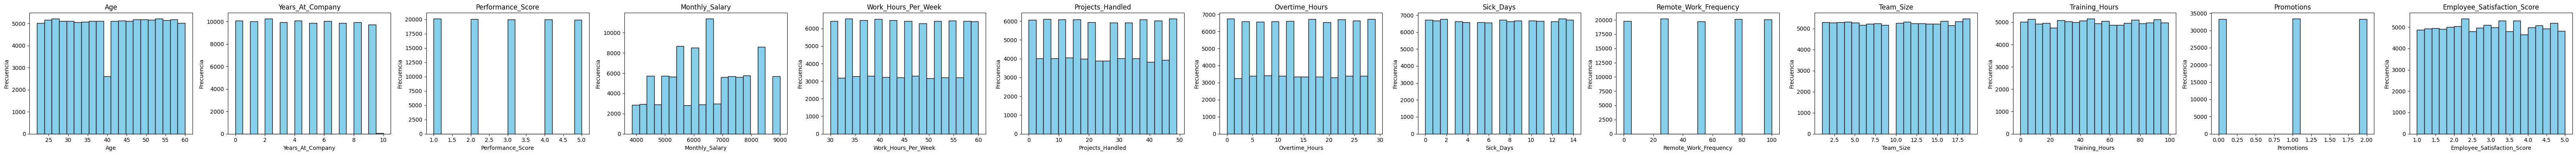

In [8]:
# Filtrar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).drop('Employee_ID',axis=1)


# Si numeric_columns es un Index, conviértelo a lista
cols = list(numeric_columns)

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Problemas**, tenemos distribuciones con picos, esos nos indica categorías. Por otro lado, tenemos variables con "valles" en su distribución (distribuciones multimodales) por lo que resultaría óptimo aplicar técnicas de feature engeneering. Por último tenemos distribuciones uniformes, por lo que cada una requeriría un procesamiento indivudual, hagamos la vista gorda e intentemos ajustar un MLP con estos datos, solo estandaricemos nuestros datos.

---

## Implementación de Red:

To**memos los datos numéricos como nuestra variable X, y la variable objetivo como ***'Employee_Satisfaction_Score'***.
- **Actividad 1**: Para todos los strings ``'@modif@'`` que aparescan en el siguiente bloque de código cámbialos para que el código funcione.

In [9]:
X = numeric_columns.drop('Employee_Satisfaction_Score', axis=1)
y = numeric_columns['Employee_Satisfaction_Score']
y = y.apply(lambda x: round(x)-1)  # Cambiamos la variable objetivo a 5 categorías numéricas

scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standar, y, test_size=0.33, random_state=42)

y_onehot_train = tf.keras.utils.to_categorical(y_train, 5)
y_onehot_test = tf.keras.utils.to_categorical(y_test, 5)

- **Actividad 2:** Implementa 3 arquitecturas de MLP, cada una con su propio nombre, cambiando la estructura de dichas arquitecturas (capas, neuronas por capa, función de activación, etc). 

In [10]:
model_basico = models.Sequential(name="MLP_Basico")

model_basico.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_basico.add(layers.Dense(16, activation='relu'))
model_basico.add(layers.Dense(5, activation='softmax'))

model_basico.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_basico = model_basico.fit(
    X_train, y_onehot_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

/home/gabo/sistema_de_aprendizaje_automatico/prueba1/Perceptr-n-multicapa/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-21 12:58:43.287409: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.2490 - loss: 1.5647 - val_accuracy: 0.2497 - val_loss: 1.5598
Epoch 2/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2600 - loss: 1.5557 - val_accuracy: 0.2508 - val_loss: 1.5597
Epoch 3/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2589 - loss: 1.5546 - val_accuracy: 0.2516 - val_loss: 1.5588
Epoch 4/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2620 - loss: 1.5537 - val_accuracy: 0.2486 - val_loss: 1.5594
Epoch 5/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2639 - loss: 1.5531 - val_accuracy: 0.2525 - val_loss: 1.5600
Epoch 6/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2667 - loss: 1.5525 - val_accuracy: 0.2528 - val_loss: 1.5597
Epoch 7/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2683 - loss: 1.5519 - val_accuracy: 0.2547 - val_loss: 1.5593
Epoch 8/30
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.2717 - loss: 1

In [11]:
model_profundo = models.Sequential(name="MLP_Profundo")

model_profundo.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_profundo.add(layers.Dense(32, activation='relu'))
model_profundo.add(layers.Dense(16, activation='relu'))
model_profundo.add(layers.Dense(5, activation='softmax'))

model_profundo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_profundo = model_profundo.fit(
    X_train, y_onehot_train,
    epochs=40,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.2525 - loss: 1.5591 - val_accuracy: 0.2492 - val_loss: 1.5578
Epoch 2/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2559 - loss: 1.5556 - val_accuracy: 0.2517 - val_loss: 1.5582
Epoch 3/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2565 - loss: 1.5552 - val_accuracy: 0.2544 - val_loss: 1.5577
Epoch 4/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2545 - loss: 1.5549 - val_accuracy: 0.2516 - val_loss: 1.5569
Epoch 5/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2561 - loss: 1.5545 - val_accuracy: 0.2582 - val_loss: 1.5578
Epoch 6/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2576 - loss: 1.5540 - val_accuracy: 0.2551 - val_loss: 1.5570
Epoch 7/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.2607 - loss: 1.5531 - val_accuracy: 0.2533 - val_loss: 1.5590
Epoch 8/40
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.2626 - loss: 1

In [12]:
model_regulado = models.Sequential(name="MLP_Regulado")

model_regulado.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_regulado.add(layers.Dropout(0.3))
model_regulado.add(layers.Dense(64, activation='tanh'))
model_regulado.add(layers.Dropout(0.2))
model_regulado.add(layers.Dense(5, activation='softmax'))

model_regulado.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_regulado = model_regulado.fit(
    X_train, y_onehot_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.2496 - loss: 1.5738 - val_accuracy: 0.2542 - val_loss: 1.5614
Epoch 2/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.2580 - loss: 1.5582 - val_accuracy: 0.2565 - val_loss: 1.5587
Epoch 3/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2555 - loss: 1.5568 - val_accuracy: 0.2546 - val_loss: 1.5581
Epoch 4/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.2570 - loss: 1.5561 - val_accuracy: 0.2490 - val_loss: 1.5589
Epoch 5/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.2550 - loss: 1.5558 - val_accuracy: 0.2546 - val_loss: 1.5576
Epoch 6/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2615 - loss: 1.5552 - val_accuracy: 0.2549 - val_loss: 1.5581
Epoch 7/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.2583 - loss: 1.5552 - val_accuracy: 0.2506 - val_loss: 1.5570
Epoch 8/50
3350/3350 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2588 - loss: 1

- **Actividad 3:** Compila y ajusta tus tres modelos con sus respectivos hiperparámetros.

In [13]:
print("Basico:", model_basico.evaluate(X_test, y_onehot_test))
print("Profundo:", model_profundo.evaluate(X_test, y_onehot_test))
print("Regulado:", model_regulado.evaluate(X_test, y_onehot_test))

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.2519 - loss: 1.5659
Basico: [1.565922498703003, 0.2518787980079651]
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2484 - loss: 1.5887
Profundo: [1.5886791944503784, 0.2483939379453659]
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2514 - loss: 1.5624
Regulado: [1.56235933303833, 0.2513939440250397]


- **Actividad 4:** Sube tus cambios al repositorio, envía el link de tu repositorio a la actividad 2 de tu checkpoint 2 y contesta las preguntas de dicha actividad.